In [17]:
import pandas as pd
import numpy as np
import geopandas as gpd
from location_tools import fetch_GADM_boundaries
%pylab inline
import rasterio
from rasterio.plot import show, show_hist
from rasterio.mask import mask
from rasterstats import point_query, zonal_stats
import osmnx as ox

Populating the interactive namespace from numpy and matplotlib


/Users/nicholasjones/anaconda3/envs/GPD/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


downloaded 26 files from https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_HTI_shp.zip
extracting to data/HTI_GADM: 

gadm36_HTI_0.cpg 5
gadm36_HTI_0.dbf 259
gadm36_HTI_0.prj 143
gadm36_HTI_0.shp 755464
gadm36_HTI_0.shx 108
gadm36_HTI_1.cpg 5
gadm36_HTI_1.dbf 8364
gadm36_HTI_1.prj 143
gadm36_HTI_1.shp 914036
gadm36_HTI_1.shx 180
gadm36_HTI_2.cpg 5
gadm36_HTI_2.dbf 43131
gadm36_HTI_2.prj 143
gadm36_HTI_2.shp 1098036
gadm36_HTI_2.shx 428
gadm36_HTI_3.cpg 5
gadm36_HTI_3.dbf 172200
gadm36_HTI_3.prj 143
gadm36_HTI_3.shp 1347612
gadm36_HTI_3.shx 1172
gadm36_HTI_4.cpg 5
gadm36_HTI_4.dbf 608064
gadm36_HTI_4.prj 143
gadm36_HTI_4.shp 1934080
gadm36_HTI_4.shx 4436
license.txt 300


In [ ]:
HT3.NAME

In [122]:
import geopandas as gpd
from location_tools import fetch_GADM_boundaries
import osmnx as ox

#fetch_GADM_boundaries('HTI')
HT3 = gpd.read_file('data/HTI_GADM/gadm36_HTI_3.shp')
HT3.set_index('NAME_3', inplace = True)
footprints = ox.footprints_from_polygon(HT3.geometry.loc['Port-au-Prince'])

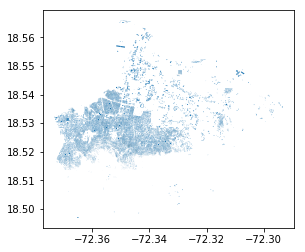

In [127]:
footprints.plot()

In [131]:
footprints.amenity.value_counts()

place_of_worship         30
toilets                  16
school                    7
restaurant                6
marketplace               5
bank                      5
hospital                  4
shower                    3
library                   3
college                   3
utc                       3
courthouse                2
theatre                   2
townhall                  2
bus_station               1
public_building           1
market                    1
fuel                      1
arts_centre               1
embassy                   1
social_centre             1
contour des toilettes     1
country_club              1
community_centre          1
Name: amenity, dtype: int64

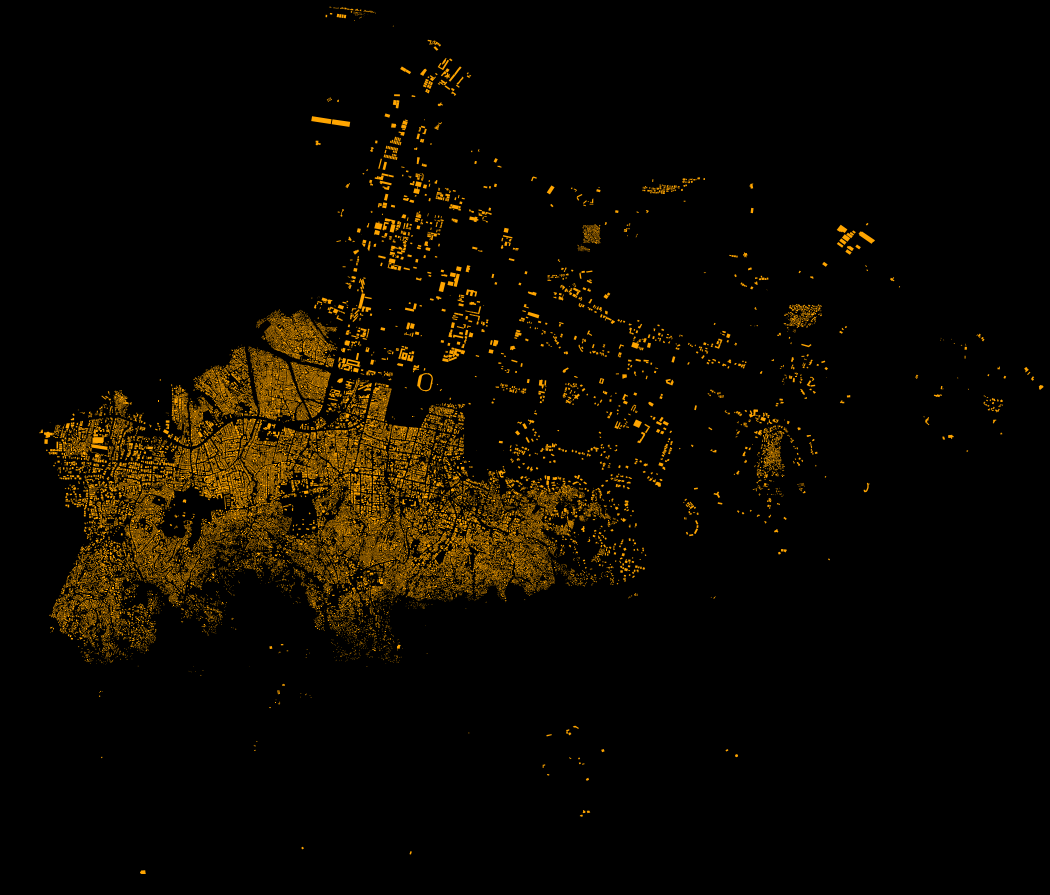

(<Figure size 1296x1296 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a35d8fba8>)

In [54]:
ox.plot_footprints(footprints, color = 'orange',bgcolor = 'k',figsize = [18,18])

In [33]:
HT3.loc['Port-au-Prince']

GID_0                                                      HTI
NAME_0                                                   Haiti
GID_1                                                  HTI.8_1
NAME_1                                                   Ouest
NL_NAME_1                                                 None
GID_2                                                HTI.8.5_1
NAME_2                                          Port-au-Prince
NL_NAME_2                                                 None
GID_3                                              HTI.8.5.6_1
VARNAME_3                                                 None
NL_NAME_3                                                 None
TYPE_3                                                 Commune
ENGTYPE_3                                              Commune
CC_3                                                      None
HASC_3                                                    None
geometry     POLYGON ((-72.31459045 18.50542068, -72.31

In [60]:
footprints = ox.project_gdf(footprints)

In [62]:
footprints[:100].area.sum()

94292.13618215093

In [74]:
point1 = (18.543307, -72.339119)
point2 = (18.532446, -72.353683)
point3 = (18.546647, -72.331920)
point4 = (18.526437, -72.350451)

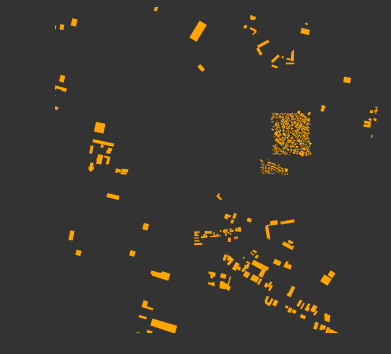

In [68]:
point = point3


dist = 612
gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
gdf_proj = ox.project_gdf(gdf)
bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='#333333', color='orange', figsize=(6,6), bbox=bbox,
                            save=False, show=True, dpi=90)
#Image('{}/{}.{}'.format(img_folder, 'paris_bldgs', extension), height=size, width=size)

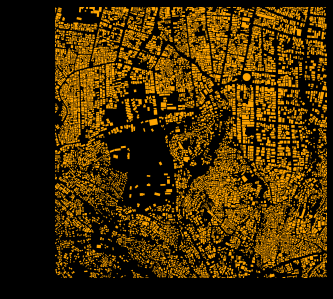

Area of building footprints: 570944 square meters


In [106]:
point1 = (18.543307, -72.339119)
point2 = (18.532446, -72.353683)
point3 = (18.546647, -72.331920)
point4 = (18.526437, -72.350451)

import geopandas as gpd
import osmnx as ox
from shapely.geometry import box

def plot_square_mile(point):
    dist = 612
    
    # download the footprints and project them into local CRS
    gdf = ox.footprints.footprints_from_point(point=point, distance=dist)
    gdf_proj = ox.project_gdf(gdf)
    
    # plot the footprints
    bbox = ox.bbox_from_point(point=point, distance=dist, project_utm=True)
    fig, ax = ox.footprints.plot_footprints(gdf_proj, bgcolor='k', color='orange', figsize=(5,5), bbox=bbox)
    
    # calculate and print the building footprint area
    footprint_area = gdf_proj.area.sum()
    print("Area of building footprints: {:.0f} square meters".format(footprint_area))

point = (18.526437, -72.350451) # near the Seminaire Theologique (STEP)
plot_square_mile(point)

In [84]:
from shapely.geometry import box
box(*bbox).area

1615706592550.7805

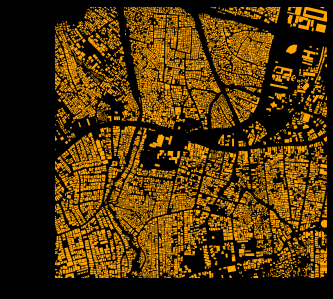

Area of building footprints: 638402 square meters


In [107]:
plot_square_mile(point2)

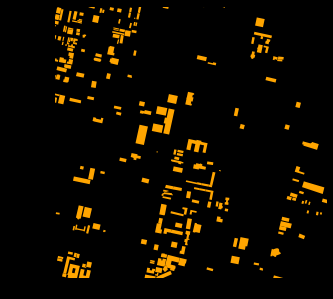

Area of building footprints: 131836 square meters


In [108]:
plot_square_mile(point1)

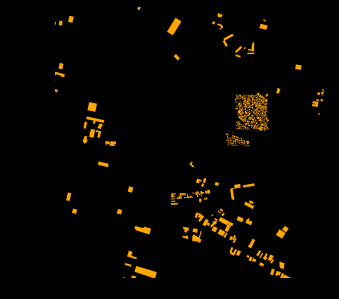

Area of building footprints: 60638 square meters


In [109]:
plot_square_mile(point3)

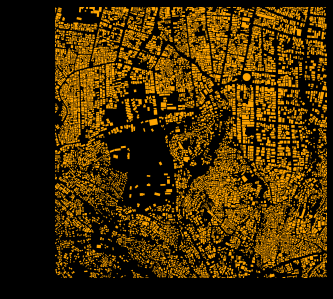

Area of building footprints: 570944 square meters


In [110]:
plot_square_mile(point4)

In [27]:
HT3

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
NAME_3,,,,,,,,,,,,,,,,
Cerca La Source,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.1_1,Cerca La Source,None,HTI.1.1.1_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.69290924000001 19.09337234, -71...."
Thomasique,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.1_1,Cerca La Source,None,HTI.1.1.2_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.78549194 19.12919998, -71.782798..."
Cerca Carvajal,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.2_1,Hinche,None,HTI.1.2.1_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.9763031 19.22549629, -71.9756088..."
Hinche,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.2_1,Hinche,None,HTI.1.2.2_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.89855957 19.03608704, -71.900428..."
MaÃ¯ssade,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.2_1,Hinche,None,HTI.1.2.3_1,None,None,Commune,Commune,None,None,"POLYGON ((-72.22173309 19.08333969, -72.222671..."
Thomonde,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.2_1,Hinche,None,HTI.1.2.4_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.87634276999999 18.94551277, -71...."
BelladÃ¨re,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.3_1,Lascahobas,None,HTI.1.3.1_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.80040741000001 18.78450966, -71...."
Lascahobas,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.3_1,Lascahobas,None,HTI.1.3.2_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.94999695 18.77291298, -71.952163..."
Savanette,HTI,Haiti,HTI.1_1,Centre,None,HTI.1.3_1,Lascahobas,None,HTI.1.3.3_1,None,None,Commune,Commune,None,None,"POLYGON ((-71.78160858 18.69425583, -71.783935..."


In [118]:
cols = ['name','amenity','height','source','status','geometry']
footprints[cols]

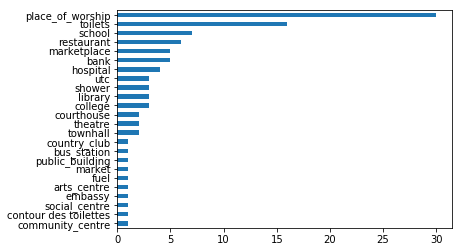

In [124]:
footprints.amenity.value_counts().sort_values(ascending=True).plot(kind = 'barh')

In [34]:
footprints

,amenity,animal_breeding,barrier,building,cosmha_stm,denomination,description,disused,fixme,geometry,...,office,operator,operator:type,project:UNICEF_ACTED_MRR_BasArtibonite_Centre,religion,sigle,source,source:haiti,source_date,source_type_imagery
161197655,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.7492258 19.0530128, -71.7492242 ...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197657,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.7489152 19.0535351, -71.74904359...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197659,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.74932320000001 19.0528791, -71.7...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197660,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.74919079999999 19.0535384, -71.7...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197665,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.7489317 19.0518601, -71.7489933 ...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197667,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.7499485 19.0525182, -71.749943 1...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197668,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.748362 19.051687, -71.7484099 19...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197672,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.7499892 19.0515252, -71.7500548 ...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197675,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.74831279999999 19.0533112, -71.7...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes
161197676,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,"POLYGON ((-71.74998410000001 19.0525518, -71.7...",...,NaN,NaN,NaN,yes,NaN,NaN,Bing With Offset,NaN,26/04/2012,yes


In [116]:
GADM1 = gpd.read_file('data/IND_GADM/gadm36_IND_1.shp')
GADM2 = gpd.read_file('data/IND_GADM/gadm36_IND_2.shp')
GADM3 = gpd.read_file('data/IND_GADM/gadm36_IND_3.shp')

In [49]:
GADM1.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'geometry'],
      dtype='object')

In [117]:
GADM3.columns

Index(['GID_0', 'NAME_0', 'GID_1', 'NAME_1', 'NL_NAME_1', 'GID_2', 'NAME_2',
       'NL_NAME_2', 'GID_3', 'NAME_3', 'VARNAME_3', 'NL_NAME_3', 'TYPE_3',
       'ENGTYPE_3', 'CC_3', 'HASC_3', 'geometry'],
      dtype='object')

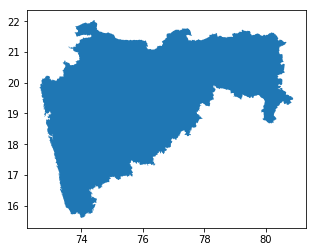

In [122]:
GADM1[GADM1.NAME_1 == 'Maharashtra'].plot()

In [137]:
maharashtra = GADM3[GADM3.NAME_1 == 'Maharashtra']
maharashtra.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,geometry
1101,IND,India,IND.20_1,Maharashtra,None,IND.20.1_1,Ahmadnagar,None,IND.20.1.1_1,Ahmadnagar,None,None,Taluk,Taluk,None,None,"POLYGON ((74.63649749755871 18.88813018798839,..."
1102,IND,India,IND.20_1,Maharashtra,None,IND.20.1_1,Ahmadnagar,None,IND.20.1.2_1,Akola,None,None,Taluk,Taluk,None,None,"POLYGON ((73.78970336914062 19.38606071472174,..."
1103,IND,India,IND.20_1,Maharashtra,None,IND.20.1_1,Ahmadnagar,None,IND.20.1.3_1,Karjat,None,None,Taluk,Taluk,None,None,"POLYGON ((74.83828735351574 18.33893013000488,..."
1104,IND,India,IND.20_1,Maharashtra,None,IND.20.1_1,Ahmadnagar,None,IND.20.1.4_1,Kopargaon,None,None,Taluk,Taluk,None,None,"POLYGON ((74.31675720214849 19.76942825317394,..."
1105,IND,India,IND.20_1,Maharashtra,None,IND.20.1_1,Ahmadnagar,None,IND.20.1.5_1,Nevasa,None,None,Taluk,Taluk,None,None,"POLYGON ((75.2155380249024 19.55770111083984, ..."


In [125]:
os.mkdir('data/maharashtra_shp')

In [138]:
maharashtra.to_file('data/maharashtra_shp/maharashtra.shp')

In [55]:
os.listdir('data')
pth_KNT = 'data/FB_India_clipped.tif'

In [56]:
raster = rasterio.open(pth_KNT)

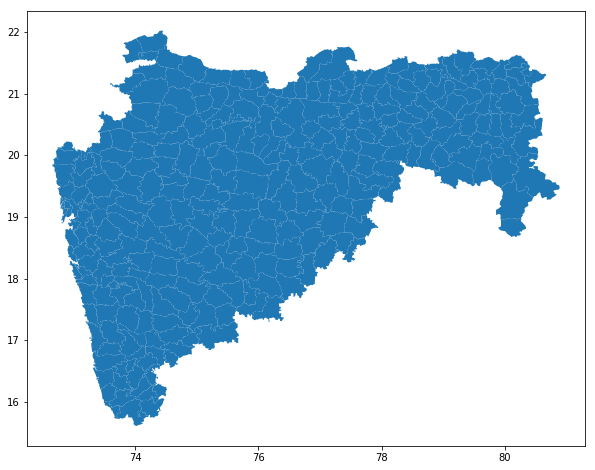

In [127]:
f, ax = plt.subplots(1,figsize=[10,10])
#show(raster, ax = ax, zorder = 2)
GADM3[GADM3.NAME_1 == 'Maharashtra'].plot(ax = ax, zorder = 1)


In [135]:
GADM3[GADM3.NAME_1 == 'Maharashtra'].NAME_2.unique()

array(['Ahmadnagar', 'Akola', 'Amravati', 'Aurangabad', 'Bhandara', 'Bid',
       'Buldana', 'Chandrapur', 'Dhule', 'Garhchiroli', 'Gondiya',
       'Hingoli', 'Jalgaon', 'Jalna', 'Kolhapur', 'Latur', 'Mumbai City',
       'Mumbai Suburban', 'Nagpur', 'Nanded', 'Nandurbar', 'Nashik',
       'Osmanabad', 'Palghar', 'Parbhani', 'Pune', 'Raigarh', 'Ratnagiri',
       'Sangli', 'Satara', 'Sindhudurg', 'Solapur', 'Thane', 'Wardha',
       'Washim', 'Yavatmal'], dtype=object)

In [131]:
os.mkdir('data/MHA_shp')

In [132]:
GADM3[GADM3.NAME_1 == 'Maharashtra'].to_file('data/MHA_shp/MHA_districts.shp')

In [89]:
zonal_stats(KNT.geometry[0], pth_KNT,
            stats="count")

[{'count': 161375}]

In [128]:
MHT = GADM3[GADM3.NAME_1 == 'Maharashtra']

In [ ]:
KNT.head(3)

In [91]:
MHT['population'] = [zonal_stats(tehsil, pth_KNT, stats="count") for tehsil in MHT.geometry]

/Users/nicholasjones/anaconda3/envs/GPD/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
KNT.population

0     [{'count': 161375}]
1     [{'count': 323970}]
2     [{'count': 121748}]
3     [{'count': 451800}]
4     [{'count': 147578}]
5      [{'count': 97788}]
6     [{'count': 201983}]
7      [{'count': 99094}]
8     [{'count': 111393}]
9     [{'count': 148060}]
10    [{'count': 140378}]
11    [{'count': 263468}]
12    [{'count': 150456}]
13     [{'count': 87864}]
14     [{'count': 67614}]
15    [{'count': 149791}]
16    [{'count': 235973}]
17    [{'count': 114085}]
18     [{'count': 92785}]
19    [{'count': 141635}]
20     [{'count': 93533}]
21    [{'count': 207381}]
22    [{'count': 241067}]
23    [{'count': 146844}]
24    [{'count': 123596}]
25    [{'count': 160026}]
26    [{'count': 273813}]
27    [{'count': 185879}]
28    [{'count': 112215}]
29     [{'count': 74785}]
Name: population, dtype: object

In [100]:
KNT.population[0][0]['count']

161375

In [102]:
KNT.population = [item[0]['count'] for item in KNT.population]

/Users/nicholasjones/anaconda3/envs/GPD/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [ ]:
KNT.plot.bar('x' = KNT)

Text(0.5, 0.98, 'Districts of Karnataka by population')

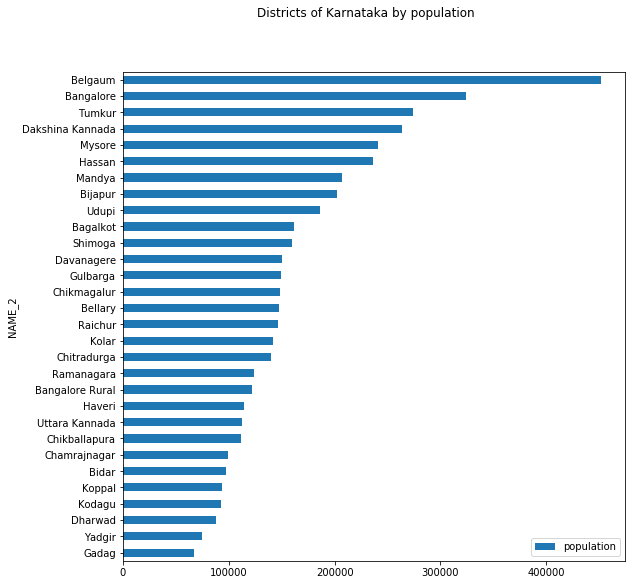

In [115]:
KNT_df.sort_values('population',ascending=True).plot.barh(x = 'NAME_2', y = 'population',figsize = [9,9])
plt.suptitle('Districts of Karnataka by population')

In [106]:
KNT_df = pd.DataFrame(KNT)

In [110]:
KNT.NAME_2.unique()

array(['Bagalkot', 'Bangalore', 'Bangalore Rural', 'Belgaum', 'Bellary',
       'Bidar', 'Bijapur', 'Chamrajnagar', 'Chikballapura', 'Chikmagalur',
       'Chitradurga', 'Dakshina Kannada', 'Davanagere', 'Dharwad',
       'Gadag', 'Gulbarga', 'Hassan', 'Haveri', 'Kodagu', 'Kolar',
       'Koppal', 'Mandya', 'Mysore', 'Raichur', 'Ramanagara', 'Shimoga',
       'Tumkur', 'Udupi', 'Uttara Kannada', 'Yadgir'], dtype=object)

In [111]:
KNT.head(1)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,population
0,IND,India,IND.16_1,Karnataka,None,IND.16.1_1,Bagalkot,None,None,District,District,None,IN.KA.BK,"POLYGON ((75.85240173 15.93246078, 75.84651184...",161375
